Classifying movie reviews: A binary classification example



# Aim

**We will learn to classify movie reviews as positive or negative, based on the text content of the reviews.**

# The IMDB dataset

We’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. 

This dataset comes packaged with Keras and has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary. This enables us to focus on model building, training, and evaluation.

In [23]:
from tensorflow.keras.datasets import imdb
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Loading the IMDB dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


**The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:**

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Because we’re restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [5]:
max([max(sequence) for sequence in train_data])

9999

## Decoding reviews back to text

 1. word_index is a dictionary mapping words to an integer index.

 2. Reverses it, mapping integer indices to words

 3. Decodes the review. Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”

In [6]:
word_index = imdb.get_word_index() #1
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()]) #2
decoded_review = " ".join(
[reverse_word_index.get(i - 3, "?") for i in train_data[0]]) #3

1654784/1641221 [==============================] - 0s 0us/step


# Preparing the data

## Encoding the integer sequences via multi-hot encoding

1. Creates an all-zero matrix of shape (len(sequences), dimension)

2. Sets specific indices of results[i] to 1s

3. Vectorized training data

4. Vectorized test data

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #1
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. #2
    return results
x_train = vectorize_sequences(train_data) #3
x_test = vectorize_sequences(test_data) #4

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize labels

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Now the data is ready to be fed into a neural network

# Building your model

The input data is vector, and the labels are scalars (1s and 0s): this is one of the simplest problem setups we can ever
encounter. A type of model that performs well on such a problem is a `plain stack of densely connected (Dense)
layers` with `relu activations`.

There are two key architecture decisions to be made about such a stack of Dense layers:
* How many layers to use
* How many units to choose for each layer

So, here we take

* Two intermediate layers with 16 units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

## Model definition

In [10]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])

## Compiling the model

In [13]:
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

## Setting aside a validation set

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training your model

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5004 - accuracy: 0.7842 - val_loss: 0.3565 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2838 - accuracy: 0.9073 - val_loss: 0.2984 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2041 - accuracy: 0.9322 - val_loss: 0.3247 - val_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1614 - accuracy: 0.9460 - val_loss: 0.2797 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1309 - accuracy: 0.9567 - val_loss: 0.2904 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1063 - accuracy: 0.9661 - val_loss: 0.3048 - val_accuracy: 0.8818
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0872 - accuracy: 0.9730 - val_loss: 0.3671 - val_accuracy: 0.8664
Epoch 8/20
30

In [16]:
history_dict = history.history

In [17]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and `validation loss`**

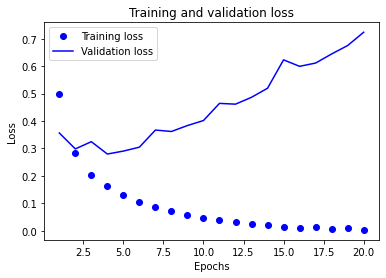

In [19]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") #1
plt.plot(epochs, val_loss_values, "b", label="Validation loss") #2
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and `validation accuracy`**

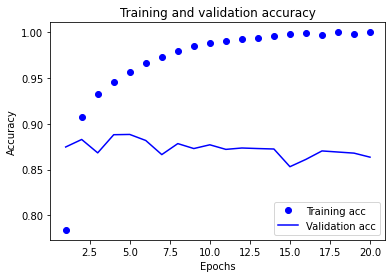

In [20]:
plt.clf() #Clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#"bo" is for "blue dot" and "b" is for "solid blue line"

**A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what we’re seeing is `overfitting`: after the `fourth epoch`, we’re overoptimizing on
the training data, and we end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.
In this case, to prevent overfitting, we could stop training after four epochs.**

## Retraining a model from scratch

**Let’s train a new model from scratch for four epochs and then evaluate it on the test data.**

In [21]:
model = keras.Sequential([
layers.Dense(16, activation="relu"),
layers.Dense(16, activation="relu"),
layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4450 - accuracy: 0.8257
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2523 - accuracy: 0.9122
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1960 - accuracy: 0.9288
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3238 - accuracy: 0.8732


The final results are as follows:

In [25]:
results

[0.32376953959465027, 0.873199999332428]

**The first number, 0.32, is the test loss, and the second number, 0.87, is the test accuracy.**

## Using a trained model to generate predictions on new data

In [22]:
model.predict(x_test)

array([[0.26693213],
       [0.99968374],
       [0.976364  ],
       ...,
       [0.20383823],
       [0.09519681],
       [0.7403956 ]], dtype=float32)

**As we can see, the model is confident for some samples (0.99 or more, or 0.01 or less) but less confident for others(0.6, 0.4).**